In [67]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats

In [424]:
def func(x,t):
    x0 = t
    return -np.exp(-(x-x0)**2)

x = np.linspace(-10,20,1000)

## 多次元対応ガウスカーネル行列

In [425]:
def kernel(x0,x1):
    t1 = 1
    t2 = 1
    t3 = 0.0
    l0 = len(x0)
    l1 = len(x1)
    delta = np.array([[x0[i] == x1[j] for j in range(l1)] for i in range(l0)])
    x0 = np.array([[x0[i] for j in range(l1)] for i in range(l0)])
    x1 = np.array([[x1[j] for j in range(l1)] for i in range(l0)])
    assert len(x0.shape) == len(x1.shape)
    m_distance = np.linalg.norm(x0-x1, axis=2) if len(x0.shape) == 3 else np.abs(x0-x1)
    return t1*np.exp(-m_distance**2/ t2) + t3*delta

In [426]:
K = kernel(x,x)

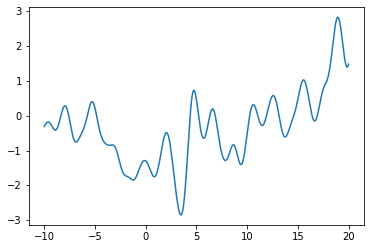

In [427]:
y =  stats.multivariate_normal.rvs(x*0,K)
plt.plot(x,y)

## ガウス過程回帰

In [438]:
x_train = [4,5,6,9]
y_train = [5,0,9,10]

x_train, y_train = np.array(x_train).T, np.array(y_train).T
K = kernel(x_train,x_train)
K_inv = np.linalg.inv(K)
K_s = kernel(x_train,x)
K_ss = kernel(x,x)

y =  stats.multivariate_normal.rvs(K_s.T@K_inv@y_train,K_ss - K_s.T@K_inv@K_s,size=6)

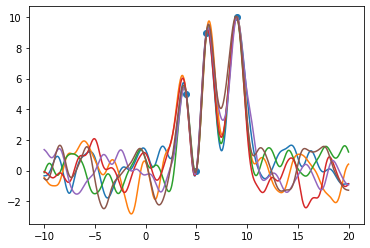

In [439]:
plt.plot(x,y.T)
plt.scatter(x_train,y_train,)